## Evidencia 2 Pregunta 1

Las siguientes son las actividades solicitadas a realizar en la evidencia 2 de la pregunta 1:
1. Utilizando la librería Scikit-learn, genera un conjunto de datos de tres características que estén linealmente relacionados.
2. Aplicando el análisis de discriminante lineal, realiza el proceso de reducción de la dimensión y representa el resultado obtenido de manera gráfica.
3. Selecciona un modelo de aprendizaje automático supervisado que te permita realizar la clasificación de ese conjunto de datos e impleméntalo en tu proyecto.
4. Utilizando las diversas métricas de evaluación, comprueba la calidad del modelo seleccionado.
5. Elabora una pequeña conclusión donde expreses tus impresiones sobre el resultado obtenido.

A continuación se presenta el desarrollo de la actividad:

In [112]:
#Importando las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [113]:
#Creando el conjunto de datos de regresión lineal con 3 características
Xl, yl = make_regression(n_samples=100, n_features=3, random_state=42)
yl = np.random.randint(0, 3, yl.shape)

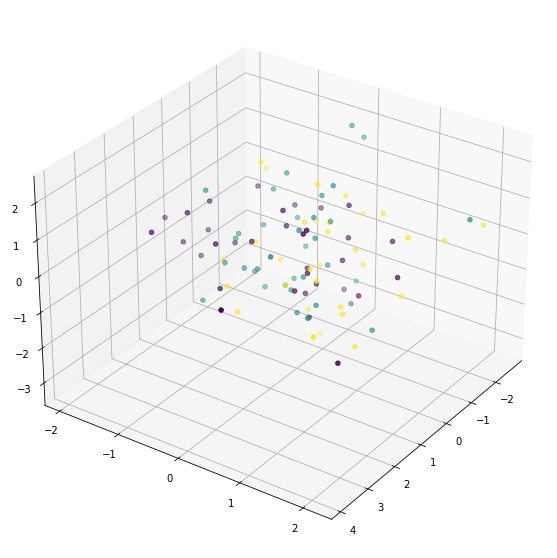

In [114]:
#Representando el conjunto de datos de regresión lineal con 3 características
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(Xl[:, 0], Xl[:, 1], Xl[:, 2], c=yl, cmap='viridis')
ax.view_init(elev=30, azim=35)
plt.show()

In [115]:
#Separando datos en train y test
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=0)
#Usando el standard scaler para normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Imprimiendo las dimensiones originales de los datos
print('Dimensiones originales de los datos de entrenamiento: ', X_train.shape)
print('Dimensiones originales de los datos de test: ', X_test.shape)

Dimensiones originales de los datos de entrenamiento:  (80, 3)
Dimensiones originales de los datos de test:  (20, 3)


In [116]:
# Usando análisis de discriminante lineal para reducir la dimensión de los datos
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#Imprimiendo las dimensiones reducidas de los datos de entrenamiento
print('Dimensiones reducidas de los datos de entrenamiento: ', X_train_lda.shape)
#Imprimiendo las dimensiones reducidas de los datos de test
print('Dimensiones reducidas de los datos de test: ', X_test_lda.shape)

Dimensiones reducidas de los datos de entrenamiento:  (80, 2)
Dimensiones reducidas de los datos de test:  (20, 2)


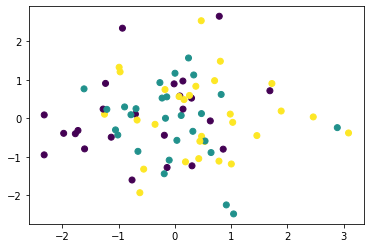

In [117]:
#Graficando los datos de entrenamiento reducidos
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
plt.show()

In [118]:
#Eligiendo un modelo de clasificación automático supervisado
#Para este primer paso se eligió el modelo de regresión logística
#Importando las librerías necesarias
from sklearn.linear_model import LogisticRegression

In [119]:
#Creando el modelo de regresión logística
lr = LogisticRegression(max_iter=100, random_state=0)

In [120]:
#Entrenando el modelo de regresión logística
lr.fit(X_train_lda, y_train)

LogisticRegression(random_state=0)

In [121]:
#Prediciendo los datos de test
y_pred = lr.predict(X_test_lda)

In [122]:
#Revisando la calidad del modelo de regresión logística con las métricas de evaluación
print('Calidad del modelo de regresión logística:\n', metrics.classification_report(y_test, y_pred))

Calidad del modelo de regresión logística:
               precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.50      0.12      0.20         8
           2       0.20      1.00      0.33         3

    accuracy                           0.25        20
   macro avg       0.34      0.41      0.23        20
weighted avg       0.38      0.25      0.20        20



## Evidencia 2 Pregunta 2
Partiendo de la situación planteada en el ejercicio anterior, propón un nuevo modelo que permita realizar igualmente la clasificación del conjunto de datos generados. Evalúa la efectividad de ambos modelos y elabora una tabla comparativa con tus resultados.
1. Modifica el conjunto de datos inicial aumentando $10^3$  veces la cantidad de elementos considera: $$n = \{3, 4, 5\}$$
2. Utiliza los modelos construidos anteriormente para clasificar de nueva forma los datos y responde a las siguientes preguntas: ¿cómo se comportan dichos modelos ante estos cambios?, ¿su desempeño varía considerablemente?
3. Elabora una pequeña conclusión en la que expreses tus impresiones sobre los resultados obtenidos.

Se presenta a continuación el desarrollo de esta actividad.

**Usando Naive-Bayes**
Para la implementación de esta actividad se eligió como segundo modelo el modelo de Naive-Bayes.

In [123]:
#Importando las librerías necesarias
from sklearn.naive_bayes import GaussianNB

In [124]:
#Creando el modelo de Naive-Bayes
nb = GaussianNB()

In [125]:
#Entrenando el modelo de Naive-Bayes
nb.fit(X_train_lda, y_train)

GaussianNB()

In [126]:
#Prediciendo los datos de test
y_pred_nb = nb.predict(X_test_lda)

In [127]:
#Revisando la calidad del modelo de Naive-Bayes con las métricas de evaluación
print('Calidad del modelo de Naive-Bayes:\n', metrics.classification_report(y_test, y_pred_nb))

Calidad del modelo de Naive-Bayes:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.71      0.62      0.67         8
           2       0.18      0.67      0.29         3

    accuracy                           0.40        20
   macro avg       0.47      0.47      0.38        20
weighted avg       0.54      0.40      0.39        20



**Modificando el conjunto inicial con la cantidad de elementos aumentada a** $10^3$
Realizando nuevamente los calculos con ambos modelos.

In [128]:
#Generando el nuevo conjunto de datos con la cantidad de elementos aumentada a 10
Xl, yl = make_regression(n_samples=100*10**3, n_features=3, random_state=42)
yl = np.random.randint(0, 3, yl.shape)

In [129]:
#Separando datos en train y test
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=0)

In [130]:
#Usando el standard scaler para normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
#Imprimiendo las dimensiones originales de los datos de entrenamiento
print('Dimensiones originales de los datos de entrenamiento: ', X_train.shape)
print('Dimensiones originales de los datos de test: ', X_test.shape)

Dimensiones originales de los datos de entrenamiento:  (80000, 3)
Dimensiones originales de los datos de test:  (20000, 3)


In [132]:
# Usando análisis de discriminante lineal para reducir la dimensión de los datos
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#Imprimiendo las dimensiones reducidas de los datos de entrenamiento
print('Dimensiones reducidas de los datos de entrenamiento: ', X_train_lda.shape)
#Imprimiendo las dimensiones reducidas de los datos de test
print('Dimensiones reducidas de los datos de test: ', X_test_lda.shape)

Dimensiones reducidas de los datos de entrenamiento:  (80000, 2)
Dimensiones reducidas de los datos de test:  (20000, 2)


In [133]:
#Usando la regresión logística para entrenar el modelo
lr = LogisticRegression(max_iter=100, random_state=0)

In [134]:
#Entrenando el modelo de regresión logística
lr.fit(X_train_lda, y_train)

LogisticRegression(random_state=0)

In [135]:
#Prediciendo los datos de test
y_pred_lr = lr.predict(X_test_lda)

In [136]:
#Revisando la calidad del modelo de regresión logística con las métricas de evaluación
print('Calidad del modelo de regresión logística:\n', metrics.classification_report(y_test, y_pred_lr))

Calidad del modelo de regresión logística:
               precision    recall  f1-score   support

           0       0.33      0.02      0.04      6625
           1       0.33      0.07      0.12      6679
           2       0.34      0.91      0.49      6696

    accuracy                           0.34     20000
   macro avg       0.33      0.33      0.22     20000
weighted avg       0.33      0.34      0.22     20000



In [137]:
#Usando el modelo de Naive-Bayes para entrenar el modelo
nb = GaussianNB()

In [138]:
#Entrenando el modelo de Naive-Bayes
nb.fit(X_train_lda, y_train)

GaussianNB()

In [139]:
#Prediciendo los datos de test
y_pred_nb = nb.predict(X_test_lda)

In [140]:
#Revisando la calidad del modelo de Naive-Bayes con las métricas de evaluación
print('Calidad del modelo de Naive-Bayes:\n', metrics.classification_report(y_test, y_pred_nb))

Calidad del modelo de Naive-Bayes:
               precision    recall  f1-score   support

           0       0.34      0.11      0.16      6625
           1       0.33      0.05      0.08      6679
           2       0.34      0.85      0.48      6696

    accuracy                           0.34     20000
   macro avg       0.33      0.33      0.24     20000
weighted avg       0.33      0.34      0.24     20000



**Modificando el conjunto inicial con la cantidad de elementos aumentada a** $10^4$
Realizando nuevamente los calculos con ambos modelos.

In [141]:
#Generando el nuevo conjunto de datos con la cantidad de elementos aumentada a 10^4
Xl, yl = make_regression(n_samples=100*10**4, n_features=3, random_state=42)
yl = np.random.randint(0, 3, yl.shape)

In [142]:
#Separando datos en train y test
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=0)

In [143]:
#Usando el standard scaler para normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [144]:
#Imprimiendo las dimensiones originales de los datos de entrenamiento
print('Dimensiones originales de los datos de entrenamiento: ', X_train.shape)
print('Dimensiones originales de los datos de test: ', X_test.shape)

Dimensiones originales de los datos de entrenamiento:  (800000, 3)
Dimensiones originales de los datos de test:  (200000, 3)


In [145]:
# Usando análisis de discriminante lineal para reducir la dimensión de los datos
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#Imprimiendo las dimensiones reducidas de los datos de entrenamiento
print('Dimensiones reducidas de los datos de entrenamiento: ', X_train_lda.shape)
#Imprimiendo las dimensiones reducidas de los datos de test
print('Dimensiones reducidas de los datos de test: ', X_test_lda.shape)

Dimensiones reducidas de los datos de entrenamiento:  (800000, 2)
Dimensiones reducidas de los datos de test:  (200000, 2)


In [146]:
#Usando la regresión logística para entrenar el modelo
lr = LogisticRegression(max_iter=100, random_state=0)

In [147]:
#Entrenando el modelo de regresión logística
lr.fit(X_train_lda, y_train)

LogisticRegression(random_state=0)

In [148]:
#Prediciendo los datos de test
y_pred_lr = lr.predict(X_test_lda)

In [149]:
#Revisando la calidad del modelo de regresión logística con las métricas de evaluación
print('Calidad del modelo de regresión logística:\n', metrics.classification_report(y_test, y_pred_lr))

Calidad del modelo de regresión logística:
               precision    recall  f1-score   support

           0       0.33      0.03      0.06     66696
           1       0.33      0.30      0.32     66566
           2       0.33      0.67      0.45     66738

    accuracy                           0.33    200000
   macro avg       0.33      0.33      0.27    200000
weighted avg       0.33      0.33      0.27    200000



In [150]:
#Usando el modelo de Naive-Bayes para entrenar el modelo
nb = GaussianNB()

In [151]:
#Entrenando el modelo de Naive-Bayes
nb.fit(X_train_lda, y_train)

GaussianNB()

In [152]:
#Prediciendo los datos de test
y_pred_nb = nb.predict(X_test_lda)

In [153]:
#Revisando la calidad del modelo de Naive-Bayes con las métricas de evaluación
print('Calidad del modelo de Naive-Bayes:\n', metrics.classification_report(y_test, y_pred_nb))

Calidad del modelo de Naive-Bayes:
               precision    recall  f1-score   support

           0       0.34      0.09      0.14     66696
           1       0.33      0.39      0.36     66566
           2       0.33      0.52      0.41     66738

    accuracy                           0.33    200000
   macro avg       0.34      0.33      0.30    200000
weighted avg       0.34      0.33      0.30    200000



**Modificando el conjunto inicial con la cantidad de elementos aumentada a** $10^5$
Realizando nuevamente los calculos con ambos modelos.

In [154]:
#Generando el nuevo conjunto de datos con la cantidad de elementos aumentada a 10^5
Xl, yl = make_regression(n_samples=100*10**5, n_features=3, random_state=42)
yl = np.random.randint(0, 3, yl.shape)

In [155]:
#Separando datos en train y test
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=0)

In [156]:
#Usando el standard scaler para normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [157]:
#Imprimiendo las dimensiones originales de los datos de entrenamiento
print('Dimensiones originales de los datos de entrenamiento: ', X_train.shape)
print('Dimensiones originales de los datos de test: ', X_test.shape)

Dimensiones originales de los datos de entrenamiento:  (8000000, 3)
Dimensiones originales de los datos de test:  (2000000, 3)


In [158]:
# Usando análisis de discriminante lineal para reducir la dimensión de los datos
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#Imprimiendo las dimensiones reducidas de los datos de entrenamiento
print('Dimensiones reducidas de los datos de entrenamiento: ', X_train_lda.shape)
#Imprimiendo las dimensiones reducidas de los datos de test
print('Dimensiones reducidas de los datos de test: ', X_test_lda.shape)

Dimensiones reducidas de los datos de entrenamiento:  (8000000, 2)
Dimensiones reducidas de los datos de test:  (2000000, 2)


In [159]:
#Usando la regresión logística para entrenar el modelo
lr = LogisticRegression(max_iter=100, random_state=0)

In [160]:
#Entrenando el modelo de regresión logística
lr.fit(X_train_lda, y_train)

LogisticRegression(random_state=0)

In [161]:
#Prediciendo los datos de test
y_pred_lr = lr.predict(X_test_lda)

In [162]:
#Revisando la calidad del modelo de regresión logística con las métricas de evaluación
print('Calidad del modelo de regresión logística:\n', metrics.classification_report(y_test, y_pred_lr))

Calidad del modelo de regresión logística:
               precision    recall  f1-score   support

           0       0.33      0.51      0.40    665674
           1       0.33      0.33      0.33    667548
           2       0.33      0.16      0.21    666778

    accuracy                           0.33   2000000
   macro avg       0.33      0.33      0.32   2000000
weighted avg       0.33      0.33      0.32   2000000



In [163]:
#Usando el modelo de Naive-Bayes para entrenar el modelo
nb = GaussianNB()

In [164]:
#Entrenando el modelo de Naive-Bayes
nb.fit(X_train_lda, y_train)

GaussianNB()

In [165]:
#Prediciendo los datos de test
y_pred_nb = nb.predict(X_test_lda)

In [166]:
#Revisando la calidad del modelo de Naive-Bayes con las métricas de evaluación
print('Calidad del modelo de Naive-Bayes:\n', metrics.classification_report(y_test, y_pred_nb))

Calidad del modelo de Naive-Bayes:
               precision    recall  f1-score   support

           0       0.33      0.53      0.41    665674
           1       0.33      0.32      0.33    667548
           2       0.33      0.15      0.21    666778

    accuracy                           0.33   2000000
   macro avg       0.33      0.33      0.31   2000000
weighted avg       0.33      0.33      0.31   2000000

